In [ ]:
# --- LIBRERÍAS NECESARIAS ---
import requests
from bs4 import BeautifulSoup
import random
from collections import Counter
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [ ]:
# --- DESCARGAR STOPWORDS EN ESPAÑOL ---
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

# --- URL de la receta ---
url = "https://www.recetasgratis.net/receta-de-empanadas-santiaguenas-77017.html"

# --- OBTENER Y PARSEAR CONTENIDO ---
contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# --- EXTRACCIÓN BÁSICA ---
print(f"Tipo de contenido: {type(contenido)}")
print(f"Encabezado principal (h1): {soup.find_all('h1')}")
italicas = soup.find_all("i")
print(f"Palabras en cursiva: {italicas if italicas else 'No se encontraron'}")

# --- EXTRAER TODOS LOS PÁRRAFOS ---
todos_parrafos = " ".join([p.text for p in soup.find_all("p")])
print(f"Veces que aparece 'empanada': {todos_parrafos.lower().count('empanada')}")
print(f"Veces que aparece 'santiagueña': {todos_parrafos.lower().count('santiagueña')}")
print(f"Veces que aparece 'carne': {todos_parrafos.lower().count('carne')}")
print(f"Veces que aparece 'cocción': {todos_parrafos.lower().count('cocción')}")

Tipo de contenido: <class 'str'>
Encabezado principal (h1): [<h1 class="titulo titulo--articulo">Receta de Empanadas santiagueñas</h1>]
Palabras en cursiva: No se encontraron
Veces que aparece 'empanada': 12
Veces que aparece 'santiagueña': 8
Veces que aparece 'carne': 6
Veces que aparece 'cocción': 3


In [ ]:
# --- FUNCIÓN PARA BUSCAR PALABRAS MANUALMENTE ---
def buscar_palabra(palabra):
    ocurrencias = todos_parrafos.lower().count(palabra.lower())
    print(f"'{palabra}' aparece {ocurrencias} veces")

buscar_palabra("empanada")

# --- PÁRRAFO ALEATORIO ---
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()
print(f"Párrafo aleatorio: {parrafo_aleatorio}")
print(f"Cantidad de palabras: {len(parrafo_aleatorio.split())}")

# --- TEXTO COMPLETO DE LA PÁGINA ---
texto_completo = soup.get_text()

'empanada' aparece 12 veces
Párrafo aleatorio: Comienza a rellenar las empandas. Para ello, humedece la mitad del borde del disco de masa y agrega una cucharada abundante de la carne en el centro. Une los bordes opuestos y haz el repulgue clásico de las empanadas de carne argentinas.
Cantidad de palabras: 42


In [ ]:
# --- LIMPIEZA DE TEXTO (VERSIÓN FINAL CON PALABRAS A ELIMINAR) ---
def limpiar_texto(texto):
    palabras_a_eliminar = ['agrega', 'pimentón', 'molido', 'saltea', 'postre',
                           'después', 'salsa', 'porque', 'cuando', 'cómo', 'comino',
                           'cucharada', 'pais', 'sopas', 'caldo', 'si', 'argentina', 'tierna', 'política']

    blacklist = stopwords_es.union(palabras_a_eliminar)

    texto_minuscula = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)
    lista_palabras = texto_sin_puntuacion.split()

    palabras_limpias = [palabra for palabra in lista_palabras if palabra not in blacklist]

    return palabras_limpias


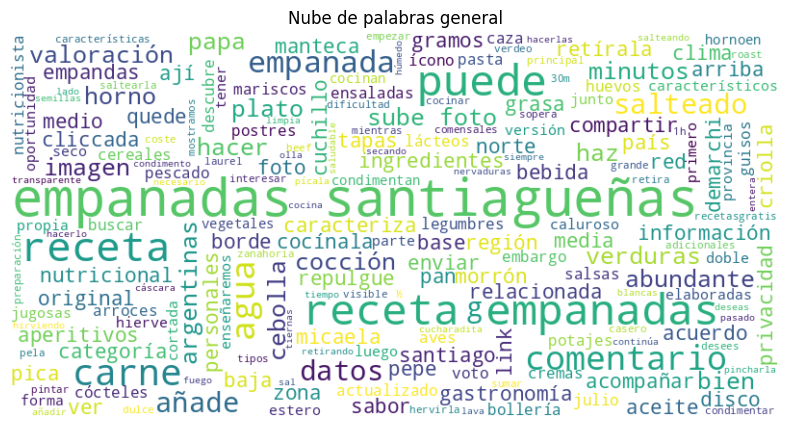

In [ ]:
# --- PROCESAR TEXTO ---
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

# --- NUBE DE PALABRAS COLORIDA ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras general")
plt.show()


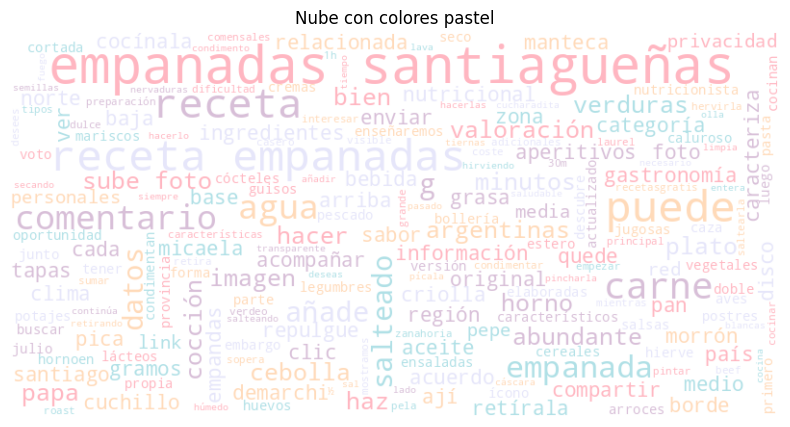

In [ ]:
# --- NUBE CON COLORES PERSONALIZADOS ---
colores_personalizados = ['#FFB6C1', '#FFDAB9', '#E6E6FA', '#D8BFD8', '#B0E0E6']
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: random.choice(colores_personalizados)
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube con colores pastel")
plt.show()


Palabras clave encontradas:
{'empanada': 1, 'relleno': 1, 'cocción': 3, 'masa': 1, 'carne': 7, 'horno': 3}


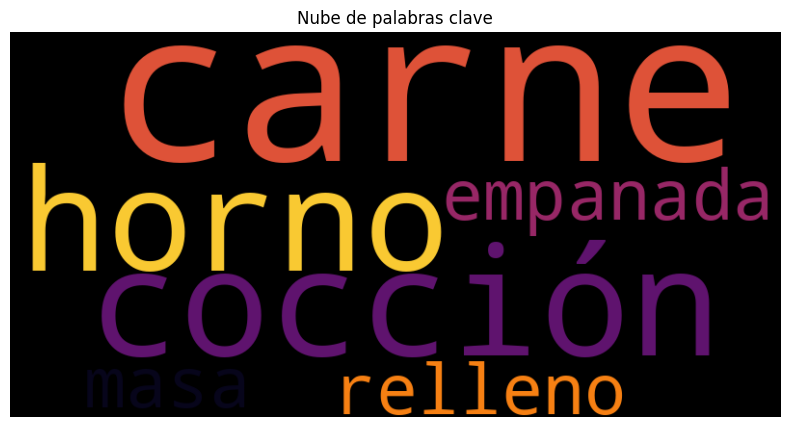

In [ ]:
# --- NUBE DE PALABRAS CLAVE (solo las importantes) ---
palabras_clave = {"empanada", "masa", "horno", "relleno", "carne", "cocción"}
contador_palabras = Counter(palabras_limpias)
palabras_importantes = {palabra: contador_palabras[palabra] for palabra in palabras_clave if palabra in contador_palabras}

print("\nPalabras clave encontradas:")
print(palabras_importantes)

wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="inferno").generate_from_frequencies(palabras_importantes)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras clave")
plt.show()

In [ ]:
# ---  NUEVO: CONTADOR DE INGREDIENTES CLAVE ---
ingredientes_clave = ["carne", "cebolla", "sal", "aceite", "ají", "huevo", "papa", "comino"]
texto_en_minusculas = texto_completo.lower()

print("\nFrecuencia de ingredientes clave:")
for ingrediente in ingredientes_clave:
    cantidad = texto_en_minusculas.count(ingrediente)
    print(f"{ingrediente.capitalize()}: {cantidad} veces")


Frecuencia de ingredientes clave:
Carne: 8 veces
Cebolla: 3 veces
Sal: 16 veces
Aceite: 2 veces
Ají: 2 veces
Huevo: 1 veces
Papa: 3 veces
Comino: 3 veces


CASO 2

In [ ]:
# --- IMPORTAR LIBRERÍAS NECESARIAS ---
import requests  # Para realizar solicitudes HTTP
from bs4 import BeautifulSoup  # Para procesar y analizar el HTML

In [ ]:
# --- DEFINIR LA URL DEL POST ---
url = "https://es.stackoverflow.com/questions/494302/unir-dos-arrays-en-uno-java"  # Dirección de la pregunta que queremos analizar

# --- OBTENER EL HTML DE LA PÁGINA ---
pagina = requests.get(url)       # Realiza la solicitud HTTP
contenido = pagina.text          # Guarda el contenido HTML en formato texto

# --- CREAR OBJETO BEAUTIFULSOUP PARA ANALIZAR EL HTML ---
soup = BeautifulSoup(contenido, "html.parser")  # Parsea el HTML de la página con el parser incorporado

In [ ]:
# --- EXTRAER EL TEXTO DE LA PREGUNTA PRINCIPAL ---
# Busca el bloque de la pregunta utilizando su clase
pregunta = soup.find("div", {"class": "js-post-body"})

# --- MOSTRAR LA PREGUNTA SI FUE ENCONTRADA ---
if pregunta:
    texto_pregunta = pregunta.get_text().strip()  # Obtiene solo el texto y elimina espacios innecesarios
    print("Pregunta:", texto_pregunta)  # Muestra la pregunta por pantalla
else:
    print("No se encontró la pregunta.") # Mensaje en caso de que no se encuentre

Pregunta: Buenas estoy intentando meter dos arrays dentro de uno y me sale el siguiente error;

Exception in thread "main" java.lang.ArrayIndexOutOfBoundsException: Index 20 out of bounds for length 20

Soy nuevo programando en java dado a eso he estado mirando en bastantes sitios pero la verdad es que no encuentro una solución por si alguien podría ayudar. A continuación dejo el código. //El problema digamos que partiría del "Ejercicio 3".
public static void main(String args[]) {
    /*Crea un programa con dos arrays de tamaño 20 y otro de tamaño 40
     El primer array lo llenaremos con numeros aleatorios entre el 0 y el 20
     el segundo array será la copia inversa del primer array
     el terter array está formado por los dos primeros que sería la primera mitad del 
     array 1 y la segunda mitad el array2*/

    int array1[] = new int[20];
    int array2[] = new int[20];
    int array3[] = new int [(20+20)-1];
    int array4[] = new int[40];
    
    for (int i = 0; i < array1.l

In [ ]:
# --- EXTRAER LA PRIMERA RESPUESTA DEL POST ---
respuesta = soup.find("div", {"class": "answercell"})  # Busca la primera celda de respuesta en el HTML

# --- MOSTRAR LA RESPUESTA SI FUE ENCONTRADA ---
if respuesta:
    texto_respuesta = respuesta.find("div", {"class": "s-prose js-post-body"})  # Extrae el texto de la respuesta
    if texto_respuesta:
        print("Respuesta:", texto_respuesta.get_text().strip())  # Muestra la respuesta, limpia el texto
    else:
        print("No se encontró el texto de la respuesta.")  # Si encuentra la celda, pero no el cuerpo del texto
else:
    print("No se encontró la respuesta.")  # Si no encuentra ninguna celda de respuesta

Respuesta: El problema del error que te salta es que intentas acceder a elementos del array1 y array2 que no existen.
Esto lo haces a la hora de hacer el el for tomando como referencia el tamaño del array3 (39) e intentas obtener valores de los array1 y array2 que tienen tamaño (20)

(EDITADO)
Una vez vista tu aclaración he modificado el código para que sea como dices:
Y por cierto a la hora de declara el tamaño del array3 mejor hazlo así:int array3[] = new int [array1.length + array2.length]; Así te ahorras problemas con el tamaño. Porque otro problema que ibas a tener si ponías solo int array3[] = new int [39]; era que no ibas a poder acceder al array3[39], que lo necesitas si quieres meter los 40 elementos del array1 y array2, esto se debe que el array empieza a contar del 0 al 39-1 y te saltaria otra vez el mismo error.
 int k = 0;
    for(int i = 0; i < array3.length; i++){
        if(i<array1.length) { 
            array3[i] = array1[i];
            System.out.println("Array3[" +